# ЛР №2

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('country_wise_latest.csv')

In [3]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
data['WHO Region'].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

In [5]:
# Кодируем признаки Recovered и WHO Region в отдельные столбцы
data = pd.get_dummies(data, columns=['Recovered','WHO Region'])

In [6]:
data.head()

,Country/Region,Confirmed,Deaths,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,...,Recovered_602249,Recovered_951166,Recovered_1325804,Recovered_1846641,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,36263,1269,9796,106,10,18,3.50,69.49,5.04,...,0,0,0,0,0,0,1,0,0,0
1,Albania,4880,144,1991,117,6,63,2.95,56.25,5.25,...,0,0,0,0,0,0,0,1,0,0
2,Algeria,27973,1163,7973,616,8,749,4.16,67.34,6.17,...,0,0,0,0,1,0,0,0,0,0
3,Andorra,907,52,52,10,0,0,5.73,88.53,6.48,...,0,0,0,0,0,0,0,1,0,0
4,Angola,950,41,667,18,1,0,4.32,25.47,16.94,...,0,0,0,0,1,0,0,0,0,0


### Масштабирование значений

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [8]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Recovered / 100 Cases']])

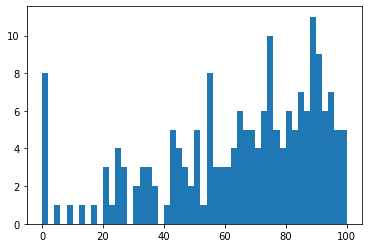

In [9]:
plt.hist(data['Recovered / 100 Cases'], 50)
plt.show()

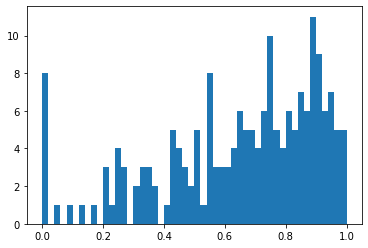

In [10]:
plt.hist(sc1_data, 50)
plt.show()

In [11]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['Country/Region','New deaths','New recovered'], axis = 1, inplace = True)

In [12]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Recovered / 100 Cases']])

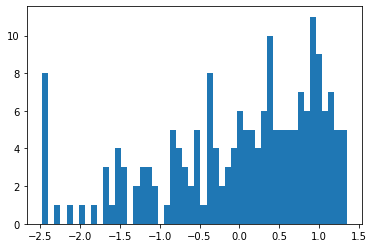

In [13]:
plt.hist(sc2_data, 50)
plt.show()

In [14]:
data.head()

,Confirmed,Deaths,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,...,Recovered_602249,Recovered_951166,Recovered_1325804,Recovered_1846641,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,36263,1269,9796,106,3.50,69.49,5.04,35526,737,2.07,...,0,0,0,0,0,0,1,0,0,0
1,4880,144,1991,117,2.95,56.25,5.25,4171,709,17.00,...,0,0,0,0,0,0,0,1,0,0
2,27973,1163,7973,616,4.16,67.34,6.17,23691,4282,18.07,...,0,0,0,0,1,0,0,0,0,0
3,907,52,52,10,5.73,88.53,6.48,884,23,2.60,...,0,0,0,0,0,0,0,1,0,0
4,950,41,667,18,4.32,25.47,16.94,749,201,26.84,...,0,0,0,0,1,0,0,0,0,0
